In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Change directory
%cd /content/drive/My Drive/Colab Notebooks/healthcare analytics

/content/drive/My Drive/Colab Notebooks/healthcare analytics


In [4]:
!ls

AfterPCA1.csv  FinalRaw.csv		   sympotms.gsheet
AfterPCA.csv   hints5_cycle2_public.csv    sympotms.xlsx
CKD.ipynb      PatientPortalAnalysis.pptx  TimeSeries.ipynb
CKD_trn.csv    PatientPortalUsage.ipynb    training_data.csv
CKD_tst.csv    ProstrateCancer.ipynb
Dataset.csv    sympotms.csv


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [195]:
dfall = pd.read_csv('training_data.csv')
dfall

,id,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,weight,family_history,first_degree_history,previous_cancer,smoker,side,tumor_diagnosis,tumor_6_months,tumor_1_year,psa_diagnosis,psa_6_months,psa_1_year,tea,symptoms,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years
0,1,Jun-05,4.0,T1c,N0,M0,I,86.0,4.0,66.0,158.0,0.0,0.0,0.0,0.0,both,70.0,NaN,39.0,8.7,NaN,4.2,2.0,U03,0,0,1,1,0,1,1,1,0
1,2,Feb-06,8.0,T3a,N1,M0,IV,66.0,2.0,70.0,174.0,0.0,0.0,0.0,1.0,both,43.0,28.0,16.0,13.7,9.8,7.5,4.0,"U06,S07",1,1,1,0,0,0,1,1,0
2,3,Mar-06,9.0,T1a,N0,M0,IIB,84.0,4.0,69.0,NaN,0.0,0.0,0.0,0.0,right,51.0,NaN,89.0,16.0,15.9,18.5,0.0,"U01,U02,U03,S10",1,1,0,0,1,1,1,1,1
3,4,Feb-05,8.0,T2b,N0,M0,IIB,86.0,3.0,69.0,173.0,0.0,0.0,0.0,0.0,right,104.0,NaN,NaN,NaN,NaN,NaN,2.0,"U01,U02,S10,O11",0,0,0,1,0,1,1,0,0
4,5,Dec-01,8.0,T4,N0,M0,IV,78.0,4.0,70.0,201.0,1.0,1.0,0.0,0.0,left,72.0,NaN,87.0,18.1,NaN,NaN,2.0,"U01,U03,U05,S07",1,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15380,15381,Jun-05,7.0,T3c,N0,M0,III,72.0,4.0,70.0,178.0,0.0,0.0,0.0,0.0,left,51.0,17.0,NaN,8.5,2.4,NaN,2.0,"U03,S07",0,0,1,0,1,0,1,0,0
15381,15382,Dec-04,7.0,T4,N0,M0,IV,77.0,4.0,NaN,205.0,0.0,0.0,0.0,0.0,both,87.0,NaN,65.0,6.1,NaN,0.0,2.0,"U02,S07,O11",1,0,0,0,0,0,0,1,0
15382,15383,Jan-01,8.0,T3c,N0,M0,III,64.0,4.0,NaN,174.0,2.0,2.0,0.0,1.0,right,32.0,NaN,15.0,12.8,NaN,NaN,1.0,"U01,U03",1,1,0,0,0,0,1,1,0
15383,15384,Jan-03,10.0,T4,N1,M1a,IV,79.0,4.0,69.0,177.0,0.0,0.0,0.0,0.0,left,NaN,35.0,42.0,14.0,12.3,12.6,2.0,"S04,P01",0,1,1,1,1,0,1,1,0


In [196]:
df = pd.read_csv('sympotms.csv')
l = list(df["symptoms"].unique())
cols = []
for item in l:
  cols= cols + item.split(',')

print(set(cols))


{'U02', 'S04', 'P01', 'S10', 'U05', 'U01', 'U06', 'O11', 'S07', 'U03', 'O01', 'P02'}


# Data Transformation

In [197]:

sof_df=pd.DataFrame(df)
sof_df.symptoms=sof_df.symptoms.str.replace(' ','')
sof_df.symptoms.str.get_dummies(sep=',')

,O01,O11,P01,P02,S04,S07,S10,U01,U02,U03,U05,U06
0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,1,1,1,1,0,0
3,0,1,0,0,0,0,1,1,1,0,0,0
4,0,0,0,0,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
56,0,0,0,0,0,0,0,1,0,0,0,1
57,0,1,0,1,0,0,0,0,1,1,0,0
58,0,1,0,0,0,0,0,0,1,0,0,1
59,1,0,0,0,0,0,0,1,1,0,0,0


In [198]:
df_s=sof_df.symptoms.str.get_dummies(sep=',')
df_s

,O01,O11,P01,P02,S04,S07,S10,U01,U02,U03,U05,U06
0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,1,1,1,1,0,0
3,0,1,0,0,0,0,1,1,1,0,0,0
4,0,0,0,0,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
56,0,0,0,0,0,0,0,1,0,0,0,1
57,0,1,0,1,0,0,0,0,1,1,0,0
58,0,1,0,0,0,0,0,0,1,0,0,1
59,1,0,0,0,0,0,0,1,1,0,0,0


In [217]:
df = pd.concat([dfall, df_s], axis=1)

In [200]:
df.shape

(15385, 45)

In [218]:
df.drop(['id','symptoms'], axis = 1, inplace = True)

In [202]:
df.shape

(15385, 43)

In [203]:
df.columns

Index(['diagnosis_date', 'gleason_score', 't_score', 'n_score', 'm_score',
       'stage', 'age', 'race', 'height', 'weight', 'family_history',
       'first_degree_history', 'previous_cancer', 'smoker', 'side',
       'tumor_diagnosis', 'tumor_6_months', 'tumor_1_year', 'psa_diagnosis',
       'psa_6_months', 'psa_1_year', 'tea', 'rd_thrpy', 'h_thrpy', 'chm_thrpy',
       'cry_thrpy', 'brch_thrpy', 'rad_rem', 'multi_thrpy', 'survival_1_year',
       'survival_7_years', 'O01', 'O11', 'P01', 'P02', 'S04', 'S07', 'S10',
       'U01', 'U02', 'U03', 'U05', 'U06'],
      dtype='object')

In [122]:
df.head

<bound method NDFrame.head of       diagnosis_date  gleason_score t_score n_score  ...  U02  U03  U05  U06
0             Jun-05            4.0     T1c      N0  ...  0.0  1.0  0.0  0.0
1             Feb-06            8.0     T3a      N1  ...  0.0  0.0  0.0  1.0
2             Mar-06            9.0     T1a      N0  ...  1.0  1.0  0.0  0.0
3             Feb-05            8.0     T2b      N0  ...  1.0  0.0  0.0  0.0
4             Dec-01            8.0      T4      N0  ...  0.0  1.0  1.0  0.0
...              ...            ...     ...     ...  ...  ...  ...  ...  ...
15380         Jun-05            7.0     T3c      N0  ...  NaN  NaN  NaN  NaN
15381         Dec-04            7.0      T4      N0  ...  NaN  NaN  NaN  NaN
15382         Jan-01            8.0     T3c      N0  ...  NaN  NaN  NaN  NaN
15383         Jan-03           10.0      T4      N1  ...  NaN  NaN  NaN  NaN
15384         Jan-04            9.0     T3b      N0  ...  NaN  NaN  NaN  NaN

[15385 rows x 43 columns]>

## TNM Staging

In [219]:
df['TNM_sc'] = ''

# df.loc[((df["t_score"] == "T1c") & (df["gleason_score"] == 4.0)),"TNM_sc"] = 1

df.loc[((df["t_score"] == "T1a") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 6.0) & (df["psa_diagnosis"] < 10.0 )),"TNM_sc"] = 'I'
df.loc[((df["t_score"] == "T1b") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 6.0) & (df["psa_diagnosis"] < 10.0 )),"TNM_sc"] = 'I'
df.loc[((df["t_score"] == "T1c") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 6.0) & (df["psa_diagnosis"] < 10.0 )),"TNM_sc"] = 'I'

df.loc[((df["t_score"] == "T2a") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 6.0) & (df["psa_diagnosis"] < 10.0 )),"TNM_sc"] = 'I'
df.loc[((df["t_score"] == "T2b") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 6.0) & (df["psa_diagnosis"] < 10.0 )),"TNM_sc"] = 'I'
df.loc[((df["t_score"] == "T2c") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 6.0) & (df["psa_diagnosis"] < 10.0 )),"TNM_sc"] = 'I'

df.loc[df.TNM_sc == "I"]

,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,weight,family_history,first_degree_history,previous_cancer,smoker,side,tumor_diagnosis,tumor_6_months,tumor_1_year,psa_diagnosis,psa_6_months,psa_1_year,tea,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years,O01,O11,P01,P02,S04,S07,S10,U01,U02,U03,U05,U06,TNM_sc
0,Jun-05,4.0,T1c,N0,M0,I,86.0,4.0,66.0,158.0,0.0,0.0,0.0,0.0,both,70.0,NaN,39.0,8.7,NaN,4.2,2.0,0,0,1,1,0,1,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,I
24,Jun-06,5.0,T2c,N0,M0,IIB,70.0,4.0,69.0,197.0,1.0,1.0,0.0,0.0,left,49.0,19.0,1.0,7.3,3.9,1.3,1.0,0,0,0,0,1,1,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,I
26,Jul-06,5.0,T2c,N0,M0,IIB,71.0,2.0,69.0,249.0,0.0,0.0,0.0,0.0,both,23.0,0.0,0.0,7.2,0.8,0.0,2.0,0,0,0,0,1,1,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,I
34,Feb-01,6.0,T1b,N0,M0,I,73.0,4.0,70.0,177.0,0.0,0.0,0.0,0.0,both,42.0,NaN,0.0,8.1,NaN,3.0,2.0,0,0,0,1,0,0,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,I
36,Aug-06,6.0,T2b,N0,M0,IIA,78.0,4.0,69.0,163.0,0.0,0.0,0.0,0.0,both,51.0,NaN,22.0,7.2,NaN,0.0,3.0,1,0,0,0,1,0,1,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15293,Jul-05,6.0,T1a,N0,M0,I,85.0,4.0,67.0,144.0,0.0,0.0,1.0,0.0,left,68.0,NaN,69.0,8.6,NaN,7.8,2.0,0,1,0,1,0,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I
15297,Jul-04,6.0,T2a,N0,M0,I,48.0,1.0,71.0,163.0,0.0,0.0,0.0,1.0,right,36.0,NaN,0.0,5.3,NaN,0.0,6.0,0,0,0,0,1,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I
15317,Apr-06,4.0,T1b,N0,M0,I,85.0,2.0,68.0,167.0,0.0,0.0,0.0,0.0,right,27.0,NaN,0.0,9.9,NaN,3.5,3.0,0,0,0,0,1,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I
15367,Jun-06,6.0,T2a,N0,M0,I,64.0,1.0,69.0,183.0,1.0,1.0,0.0,0.0,left,121.0,NaN,83.0,6.9,NaN,1.3,4.0,1,1,1,0,1,0,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I


In [220]:
df.loc[((df["t_score"] == "T1a") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 6.0) & ((df["psa_diagnosis"] >= 10.0) & (df["psa_diagnosis"] < 20.0))),"TNM_sc"] = 'IIA'
df.loc[((df["t_score"] == "T1b") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 6.0) & ((df["psa_diagnosis"] >= 10.0) & (df["psa_diagnosis"] < 20.0))),"TNM_sc"] = 'IIA'
df.loc[((df["t_score"] == "T1c") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 6.0) & ((df["psa_diagnosis"] >= 10.0) & (df["psa_diagnosis"] < 20.0))),"TNM_sc"] = 'IIA'

df.loc[((df["t_score"] == "T2a") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 6.0) & ((df["psa_diagnosis"] >= 10.0) & (df["psa_diagnosis"] < 20.0))),"TNM_sc"] = 'IIA'
df.loc[((df["t_score"] == "T2b") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 6.0) & ((df["psa_diagnosis"] >= 10.0) & (df["psa_diagnosis"] < 20.0))),"TNM_sc"] = 'IIA'
df.loc[((df["t_score"] == "T2c") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 6.0) & ((df["psa_diagnosis"] >= 10.0) & (df["psa_diagnosis"] < 20.0))),"TNM_sc"] = 'IIA'

df.loc[df.TNM_sc == "IIA"]

,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,weight,family_history,first_degree_history,previous_cancer,smoker,side,tumor_diagnosis,tumor_6_months,tumor_1_year,psa_diagnosis,psa_6_months,psa_1_year,tea,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years,O01,O11,P01,P02,S04,S07,S10,U01,U02,U03,U05,U06,TNM_sc
5,Jul-01,3.0,T1a,N0,M0,IIA,75.0,4.0,69.0,166.0,0.0,0.0,0.0,0.0,left,47.0,NaN,62.0,12.3,11.9,12.7,2.0,0,0,0,0,1,0,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,IIA
29,Aug-05,3.0,T2a,N0,M0,IIA,81.0,4.0,70.0,169.0,0.0,0.0,0.0,0.0,right,56.0,NaN,90.0,15.7,NaN,17.9,3.0,0,0,0,0,1,0,0,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,IIA
77,Jan-03,6.0,T1b,N0,M0,IIA,77.0,4.0,70.0,154.0,0.0,0.0,0.0,0.0,both,49.0,NaN,30.0,15.3,12.6,13.2,3.0,1,0,1,0,1,0,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIA
88,Mar-05,5.0,T2a,N0,M0,IIA,74.0,1.0,71.0,158.0,1.0,0.0,0.0,1.0,both,27.0,0.0,0.0,14.8,9.2,2.0,2.0,0,0,0,1,0,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIA
98,Nov-05,6.0,T1c,N0,M0,IIA,76.0,4.0,69.0,223.0,NaN,NaN,NaN,NaN,both,38.0,26.0,21.0,13.8,11.9,11.8,NaN,0,0,1,0,1,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15236,Dec-03,6.0,T1b,N0,M0,IIA,70.0,4.0,70.0,206.0,0.0,0.0,1.0,1.0,both,46.0,NaN,55.0,15.9,NaN,14.1,3.0,0,1,0,0,1,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIA
15249,Jun-05,6.0,T1b,N0,M0,IIA,74.0,2.0,68.0,164.0,0.0,0.0,0.0,0.0,right,54.0,NaN,41.0,11.1,NaN,8.8,2.0,0,0,1,1,0,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIA
15307,Jan-06,6.0,T1a,N0,M0,IIA,87.0,2.0,68.0,177.0,0.0,0.0,1.0,0.0,both,40.0,NaN,0.0,10.7,NaN,NaN,2.0,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIA
15348,Aug-06,6.0,T2a,N0,M0,IIA,71.0,4.0,69.0,178.0,1.0,1.0,0.0,0.0,both,78.0,NaN,78.0,12.2,NaN,12.4,1.0,0,0,1,0,1,0,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIA


In [221]:
df.loc[((df["t_score"] == "T1a") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] == 7.0) & (df["psa_diagnosis"] < 20.0)),"TNM_sc"] = 'IIB'
df.loc[((df["t_score"] == "T1b") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] == 7.0) & (df["psa_diagnosis"] < 20.0)),"TNM_sc"] = 'IIB'
df.loc[((df["t_score"] == "T1c") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] == 7.0) & (df["psa_diagnosis"] < 20.0)),"TNM_sc"] = 'IIB'

df.loc[((df["t_score"] == "T2a") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] == 7.0) & (df["psa_diagnosis"] < 20.0)),"TNM_sc"] = 'IIB'
df.loc[((df["t_score"] == "T2b") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] == 7.0) & (df["psa_diagnosis"] < 20.0)),"TNM_sc"] = 'IIB'
df.loc[((df["t_score"] == "T2c") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] == 7.0) & (df["psa_diagnosis"] < 20.0)),"TNM_sc"] = 'IIB'
df.loc[df.TNM_sc == "IIB"]

,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,weight,family_history,first_degree_history,previous_cancer,smoker,side,tumor_diagnosis,tumor_6_months,tumor_1_year,psa_diagnosis,psa_6_months,psa_1_year,tea,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years,O01,O11,P01,P02,S04,S07,S10,U01,U02,U03,U05,U06,TNM_sc
9,Nov-04,7.0,T1a,N0,M0,IIA,83.0,2.0,68.0,163.0,0.0,0.0,0.0,0.0,both,62.0,NaN,58.0,9.7,NaN,8.3,1.0,0,0,0,0,1,1,1,1,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,IIB
11,Jan-06,7.0,T2b,N0,M0,IIA,80.0,4.0,70.0,209.0,0.0,0.0,0.0,0.0,both,22.0,NaN,0.0,9.8,NaN,2.1,4.0,0,0,0,1,1,0,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,IIB
12,Aug-03,7.0,T2c,N0,M0,IIB,70.0,4.0,70.0,193.0,1.0,1.0,0.0,1.0,left,38.0,NaN,33.0,16.7,NaN,13.9,1.0,0,0,1,1,0,0,1,1,1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,IIB
20,Mar-04,7.0,T1c,N0,M0,IIA,87.0,4.0,69.0,193.0,1.0,0.0,0.0,0.0,right,43.0,NaN,NaN,12.0,NaN,NaN,1.0,1,1,0,1,0,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,IIB
23,Oct-05,7.0,T1c,N0,M0,IIA,78.0,2.0,69.0,219.0,0.0,0.0,0.0,0.0,left,45.0,54.0,67.0,11.8,NaN,12.0,3.0,0,1,0,0,1,0,1,1,1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,IIB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15273,Nov-00,7.0,T1c,N0,M0,IIA,84.0,4.0,69.0,173.0,1.0,0.0,0.0,0.0,left,39.0,NaN,32.0,13.0,NaN,12.0,2.0,0,0,1,0,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIB
15312,Sep-02,7.0,T1a,N0,M0,IIA,91.0,1.0,67.0,152.0,0.0,0.0,0.0,1.0,both,36.0,NaN,18.0,5.0,NaN,2.8,4.0,0,1,0,0,1,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIB
15316,Aug-05,7.0,T2c,N0,M0,IIB,NaN,2.0,70.0,179.0,0.0,0.0,0.0,0.0,left,50.0,NaN,14.0,5.1,NaN,0.0,3.0,0,0,0,0,1,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIB
15325,Jan-05,7.0,T2c,N0,M0,IIB,80.0,2.0,69.0,146.0,1.0,0.0,0.0,0.0,both,48.0,NaN,0.0,7.3,NaN,0.0,1.0,0,0,0,1,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIB


In [222]:
df.loc[((df["t_score"] == "T1a") & (df["n_score"] == "N0") & (df["TNM_sc"] == '') & (df["m_score"] == "M0") & (df["gleason_score"] == 8.0) & (df["psa_diagnosis"] < 20.0)),"TNM_sc"] = 'IIC'
df.loc[((df["t_score"] == "T1b") & (df["n_score"] == "N0") & (df["TNM_sc"] == '') & (df["m_score"] == "M0") & (df["gleason_score"] == 8.0) & (df["psa_diagnosis"] < 20.0)),"TNM_sc"] = 'IIC'
df.loc[((df["t_score"] == "T1c") & (df["n_score"] == "N0") & (df["TNM_sc"] == '') & (df["m_score"] == "M0") & (df["gleason_score"] == 8.0) & (df["psa_diagnosis"] < 20.0)),"TNM_sc"] = 'IIC'

df.loc[((df["t_score"] == "T2a") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["TNM_sc"] == '') & (df["gleason_score"] == 8.0) & (df["psa_diagnosis"] < 20.0)),"TNM_sc"] = 'IIC'
df.loc[((df["t_score"] == "T2b") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["TNM_sc"] == '') & (df["gleason_score"] == 8.0) & (df["psa_diagnosis"] < 20.0)),"TNM_sc"] = 'IIC'
df.loc[((df["t_score"] == "T2c") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["TNM_sc"] == '') & (df["gleason_score"] == 8.0) & (df["psa_diagnosis"] < 20.0)),"TNM_sc"] = 'IIC'
df.loc[df.TNM_sc == "IIC"]

,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,weight,family_history,first_degree_history,previous_cancer,smoker,side,tumor_diagnosis,tumor_6_months,tumor_1_year,psa_diagnosis,psa_6_months,psa_1_year,tea,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years,O01,O11,P01,P02,S04,S07,S10,U01,U02,U03,U05,U06,TNM_sc
6,Oct-05,8.0,T1b,N0,M0,IIB,85.0,4.0,67.0,166.0,1.0,1.0,0.0,0.0,right,29.0,NaN,0.0,4.4,NaN,0.7,1.0,1,0,0,1,1,0,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,IIC
32,Sep-06,8.0,T2a,N0,M0,IIB,83.0,3.0,68.0,164.0,1.0,1.0,0.0,0.0,both,84.0,79.0,82.0,7.3,5.2,6.6,1.0,0,0,1,0,1,0,1,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,IIC
71,Aug-01,8.0,T2a,N0,M0,IIB,63.0,4.0,71.0,220.0,NaN,NaN,NaN,NaN,left,47.0,NaN,61.0,11.0,NaN,11.5,NaN,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIC
81,Mar-06,8.0,T1a,N0,M0,IIB,NaN,4.0,70.0,165.0,0.0,0.0,0.0,0.0,right,36.0,22.0,20.0,15.1,12.2,11.8,0.0,1,1,0,1,0,0,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIC
82,Feb-03,8.0,T2c,N0,M0,IIB,77.0,4.0,69.0,183.0,0.0,0.0,0.0,0.0,both,76.0,NaN,67.0,16.4,NaN,17.8,1.0,1,1,0,1,0,1,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15288,Aug-05,8.0,T2a,N0,M0,IIB,80.0,2.0,70.0,174.0,1.0,0.0,0.0,0.0,both,25.0,NaN,0.0,5.2,NaN,NaN,2.0,0,0,0,1,0,1,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIC
15313,Mar-04,8.0,T2b,N0,M0,IIB,73.0,4.0,71.0,NaN,0.0,0.0,0.0,1.0,left,31.0,NaN,0.0,12.3,NaN,6.8,4.0,0,0,0,0,0,1,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIC
15360,Apr-05,8.0,T2c,N0,M0,IIB,88.0,4.0,69.0,174.0,1.0,1.0,1.0,0.0,both,38.0,NaN,28.0,15.7,NaN,14.8,1.0,1,1,0,0,0,0,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIC
15361,Sep-05,8.0,T1a,N0,M0,IIB,79.0,3.0,69.0,179.0,2.0,2.0,0.0,0.0,left,43.0,21.0,12.0,6.4,5.2,3.1,3.0,0,1,0,1,1,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIC


In [223]:
df.loc[((df["t_score"] == "T1a") & (df["TNM_sc"] == '') & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 8.0) & (df["psa_diagnosis"] >= 20.0)),"TNM_sc"] = 'IIIA'
df.loc[((df["t_score"] == "T1b") & (df["TNM_sc"] == '') & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 8.0) & (df["psa_diagnosis"] >= 20.0)),"TNM_sc"] = 'IIIA'
df.loc[((df["t_score"] == "T1c") & (df["TNM_sc"] == '') & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 8.0) & (df["psa_diagnosis"] >= 20.0)),"TNM_sc"] = 'IIIA'

df.loc[((df["t_score"] == "T2a") & (df["TNM_sc"] == '') & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 8.0) & (df["psa_diagnosis"] >= 20.0)),"TNM_sc"] = 'IIIA'
df.loc[((df["t_score"] == "T2b") & (df["TNM_sc"] == '') & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 8.0) & (df["psa_diagnosis"] >= 20.0)),"TNM_sc"] = 'IIIA'
df.loc[((df["t_score"] == "T2c") & (df["TNM_sc"] == '') & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 8.0) & (df["psa_diagnosis"] >= 20.0)),"TNM_sc"] = 'IIIA'
df.loc[df.TNM_sc == "IIIA"]

,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,weight,family_history,first_degree_history,previous_cancer,smoker,side,tumor_diagnosis,tumor_6_months,tumor_1_year,psa_diagnosis,psa_6_months,psa_1_year,tea,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years,O01,O11,P01,P02,S04,S07,S10,U01,U02,U03,U05,U06,TNM_sc
982,Aug-00,7.0,T1b,N0,M0,IIB,80.0,4.0,67.0,166.0,0.0,0.0,0.0,0.0,right,58.0,NaN,81.0,22.0,NaN,24.0,5.0,1,1,0,1,0,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIIA
1784,Nov-04,3.0,T1a,N0,M0,IIB,80.0,4.0,71.0,194.0,1.0,1.0,0.0,0.0,both,29.0,NaN,0.0,25.0,NaN,17.3,3.0,0,0,1,1,1,0,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIIA
2232,Nov-04,7.0,T1a,N0,M0,IIB,64.0,4.0,71.0,237.0,NaN,NaN,NaN,NaN,right,54.0,68.0,NaN,20.5,22.5,NaN,NaN,0,1,0,0,0,1,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIIA
2307,Sep-06,7.0,T2a,N0,M0,IIB,74.0,4.0,69.0,197.0,1.0,1.0,0.0,0.0,left,54.0,NaN,24.0,24.0,NaN,19.5,2.0,1,1,1,0,0,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIIA
2737,Apr-01,3.0,T2c,N0,M0,IIB,72.0,4.0,NaN,173.0,1.0,0.0,0.0,0.0,right,48.0,NaN,39.0,28.0,NaN,NaN,0.0,0,0,1,0,0,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIIA
3212,May-05,8.0,T2c,N0,M0,IIB,67.0,4.0,69.0,180.0,0.0,0.0,0.0,0.0,both,50.0,44.0,41.0,27.0,25.1,23.1,2.0,1,1,0,0,0,0,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIIA
3664,Feb-00,7.0,T2b,N0,M0,IIB,59.0,4.0,72.0,185.0,0.0,0.0,0.0,0.0,right,29.0,0.0,0.0,22.0,18.1,13.2,3.0,0,0,0,0,1,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIIA
3814,Feb-06,7.0,T2c,N0,M0,IIB,71.0,4.0,70.0,162.0,0.0,0.0,0.0,0.0,both,55.0,NaN,80.0,20.0,NaN,19.6,4.0,0,0,0,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIIA
4284,Jan-05,7.0,T2a,N0,M0,IIB,83.0,4.0,69.0,195.0,1.0,1.0,0.0,0.0,right,81.0,NaN,134.0,21.3,NaN,24.6,3.0,0,0,1,0,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIIA
4388,Jul-05,8.0,T2b,N0,M0,IIB,81.0,4.0,71.0,214.0,0.0,0.0,0.0,0.0,both,48.0,NaN,32.0,22.0,NaN,20.0,4.0,1,1,0,0,0,0,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIIA


In [224]:
df.loc[((df["t_score"] == "T3a") & (df["TNM_sc"] == '') & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 8.0)),"TNM_sc"] = 'IIIB'
df.loc[((df["t_score"] == "T3b") & (df["TNM_sc"] == '') & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 8.0)),"TNM_sc"] = 'IIIB'
df.loc[((df["t_score"] == "T3c") & (df["TNM_sc"] == '') & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 8.0)),"TNM_sc"] = 'IIIB'

df.loc[((df["t_score"] == "T4") & (df["TNM_sc"] == '') & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 8.0)),"TNM_sc"] = 'IIIB'
# df.loc[((df["t_score"] == "T2b") & (df["TNM_sc"] == '') & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 8.0) & (df["psa_diagnosis"] < 20.0)),"TNM_sc"] = 'IIIB'
# df.loc[((df["t_score"] == "T2c") & (df["TNM_sc"] == '') & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 8.0) & (df["psa_diagnosis"] < 20.0)),"TNM_sc"] = 'IIIB'
df.loc[df.TNM_sc == "IIIB"]

,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,weight,family_history,first_degree_history,previous_cancer,smoker,side,tumor_diagnosis,tumor_6_months,tumor_1_year,psa_diagnosis,psa_6_months,psa_1_year,tea,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years,O01,O11,P01,P02,S04,S07,S10,U01,U02,U03,U05,U06,TNM_sc
4,Dec-01,8.0,T4,N0,M0,IV,78.0,4.0,70.0,201.0,1.0,1.0,0.0,0.0,left,72.0,NaN,87.0,18.1,NaN,NaN,2.0,1,1,1,0,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,IIIB
7,Dec-05,8.0,T4,N0,M0,IV,78.0,4.0,70.0,157.0,NaN,NaN,NaN,NaN,right,85.0,NaN,42.0,8.8,NaN,NaN,NaN,1,0,1,0,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,IIIB
8,Jan-04,6.0,T3b,N0,M0,III,75.0,1.0,69.0,NaN,0.0,0.0,1.0,0.0,left,51.0,NaN,3.0,16.2,12.4,9.3,4.0,1,1,0,0,0,0,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,IIIB
10,Nov-04,6.0,T3c,N0,M0,III,59.0,4.0,70.0,215.0,NaN,NaN,NaN,NaN,left,32.0,NaN,0.0,3.9,NaN,0.0,NaN,0,0,1,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,IIIB
13,Oct-06,7.0,T4,N0,M0,IV,74.0,4.0,70.0,175.0,0.0,0.0,0.0,0.0,right,92.0,87.0,93.0,11.8,11.4,11.5,2.0,0,0,1,0,1,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,IIIB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15365,Aug-01,6.0,T3b,N0,M0,III,87.0,4.0,68.0,156.0,2.0,2.0,0.0,0.0,both,41.0,26.0,13.0,9.4,8.1,7.0,3.0,0,1,1,0,0,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIIB
15371,Aug-01,7.0,T3b,N0,M0,III,80.0,4.0,68.0,NaN,0.0,0.0,0.0,0.0,both,47.0,31.0,32.0,11.4,10.1,9.2,2.0,0,0,1,0,1,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIIB
15380,Jun-05,7.0,T3c,N0,M0,III,72.0,4.0,70.0,178.0,0.0,0.0,0.0,0.0,left,51.0,17.0,NaN,8.5,2.4,NaN,2.0,0,0,1,0,1,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIIB
15381,Dec-04,7.0,T4,N0,M0,IV,77.0,4.0,NaN,205.0,0.0,0.0,0.0,0.0,both,87.0,NaN,65.0,6.1,NaN,0.0,2.0,1,0,0,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIIB


In [225]:
df.loc[((df["n_score"] == "N0") & (df["TNM_sc"] == '') & (df["m_score"] == "M0") & ((df["gleason_score"] == 9.0) | (df["gleason_score"] == 10.0))),"TNM_sc"] = 'IIIC'

df.loc[df.TNM_sc == "IIIC"]

,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,weight,family_history,first_degree_history,previous_cancer,smoker,side,tumor_diagnosis,tumor_6_months,tumor_1_year,psa_diagnosis,psa_6_months,psa_1_year,tea,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years,O01,O11,P01,P02,S04,S07,S10,U01,U02,U03,U05,U06,TNM_sc
2,Mar-06,9.0,T1a,N0,M0,IIB,84.0,4.0,69.0,NaN,0.0,0.0,0.0,0.0,right,51.0,NaN,89.0,16.0,15.9,18.5,0.0,1,1,0,0,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,IIIC
17,Sep-03,9.0,T2c,N0,M0,IIB,70.0,4.0,71.0,178.0,1.0,1.0,0.0,0.0,left,43.0,NaN,25.0,8.1,6.7,4.1,2.0,0,0,0,0,0,1,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,IIIC
31,Oct-03,9.0,T2c,N0,M0,IIB,70.0,4.0,69.0,175.0,0.0,0.0,0.0,0.0,both,52.0,51.0,54.0,15.9,14.3,13.1,3.0,1,1,0,1,0,0,1,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,IIIC
39,May-06,10.0,T2c,N0,M0,IIB,62.0,2.0,72.0,211.0,0.0,0.0,0.0,0.0,both,57.0,NaN,60.0,13.7,13.9,15.3,3.0,0,0,0,1,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,IIIC
60,Nov-06,10.0,T4,N0,M0,IV,89.0,2.0,68.0,173.0,0.0,0.0,0.0,0.0,both,46.0,NaN,59.0,16.0,NaN,13.7,2.0,1,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,IIIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15356,Jun-04,10.0,T3b,N0,M0,III,NaN,4.0,70.0,175.0,0.0,0.0,0.0,0.0,left,56.0,69.0,101.0,11.3,10.6,13.8,2.0,1,1,0,0,1,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIIC
15364,Jan-04,10.0,T4,N0,M0,IV,68.0,4.0,70.0,175.0,1.0,0.0,0.0,0.0,right,68.0,NaN,65.0,11.9,NaN,NaN,4.0,1,0,1,1,0,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIIC
15375,Oct-05,9.0,T1b,N0,M0,IIB,59.0,2.0,71.0,NaN,1.0,0.0,0.0,0.0,both,62.0,NaN,28.0,13.3,NaN,7.8,5.0,0,0,1,0,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIIC
15376,May-01,9.0,T1a,N0,M0,IIB,71.0,4.0,69.0,168.0,0.0,0.0,0.0,0.0,both,40.0,26.0,NaN,6.8,3.9,NaN,1.0,0,0,1,0,0,1,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIIC


In [226]:
df.loc[((df["n_score"] == "N1") & (df["TNM_sc"] == '')),"TNM_sc"] = 'IVA'
df.loc[df.TNM_sc == "IVA"]

,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,weight,family_history,first_degree_history,previous_cancer,smoker,side,tumor_diagnosis,tumor_6_months,tumor_1_year,psa_diagnosis,psa_6_months,psa_1_year,tea,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years,O01,O11,P01,P02,S04,S07,S10,U01,U02,U03,U05,U06,TNM_sc
1,Feb-06,8.0,T3a,N1,M0,IV,66.0,2.0,70.0,174.0,0.0,0.0,0.0,1.0,both,43.0,28.0,16.0,13.7,9.8,7.5,4.0,1,1,1,0,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,IVA
14,Dec-01,8.0,T4,N1,M0,IV,88.0,4.0,NaN,167.0,NaN,NaN,NaN,NaN,both,41.0,NaN,31.0,NaN,NaN,14.8,NaN,1,0,0,0,1,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,IVA
15,Jun-05,4.0,T4,N1,M0,IV,90.0,4.0,68.0,160.0,0.0,0.0,0.0,0.0,left,42.0,3.0,0.0,5.2,1.5,0.0,3.0,0,0,1,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IVA
21,May-04,6.0,T3c,N1,M0,IV,59.0,4.0,NaN,192.0,0.0,0.0,0.0,0.0,both,21.0,NaN,0.0,2.8,NaN,0.0,4.0,1,0,1,0,0,0,1,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,IVA
22,Apr-06,9.0,T4,N1,M0,IV,79.0,4.0,67.0,167.0,0.0,0.0,0.0,0.0,right,37.0,28.0,NaN,6.1,6.2,NaN,4.0,1,0,1,0,0,0,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,IVA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15359,Aug-05,9.0,T3a,N1,M0,IV,90.0,4.0,68.0,177.0,0.0,0.0,0.0,0.0,right,38.0,19.0,NaN,7.2,2.6,NaN,1.0,1,0,1,0,1,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IVA
15362,Sep-06,3.0,T4,N1,M0,IV,75.0,4.0,NaN,159.0,1.0,1.0,0.0,0.0,left,31.0,NaN,5.0,6.0,NaN,1.6,5.0,1,0,1,0,0,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IVA
15363,Feb-01,10.0,T3a,N1,M0,IV,92.0,4.0,67.0,161.0,0.0,0.0,0.0,0.0,right,50.0,NaN,NaN,16.3,NaN,NaN,2.0,1,1,1,0,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IVA
15379,Oct-06,6.0,T3c,N1,M1a,IV,81.0,4.0,69.0,149.0,0.0,0.0,0.0,0.0,left,NaN,NaN,NaN,10.5,NaN,NaN,3.0,1,0,1,0,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IVA


In [227]:
df.loc[(((df["m_score"] == "M1a") | (df["m_score"] == "M1a") | (df["m_score"] == "M1a"))& (df["TNM_sc"] == '')),"TNM_sc"] = 'IVB'
df.loc[df.TNM_sc == "IVB"]

,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,weight,family_history,first_degree_history,previous_cancer,smoker,side,tumor_diagnosis,tumor_6_months,tumor_1_year,psa_diagnosis,psa_6_months,psa_1_year,tea,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years,O01,O11,P01,P02,S04,S07,S10,U01,U02,U03,U05,U06,TNM_sc
91,Dec-04,9.0,T4,NX,M1a,IV,80.0,4.0,71.0,NaN,2.0,2.0,0.0,0.0,both,50.0,NaN,51.0,17.2,NaN,16.4,2.0,1,0,1,0,0,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IVB
124,Apr-03,9.0,T2c,NX,M1a,IV,75.0,4.0,NaN,197.0,2.0,2.0,0.0,0.0,right,56.0,NaN,NaN,15.7,NaN,NaN,4.0,1,0,0,0,1,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IVB
379,Jul-06,8.0,T4,NX,M1a,IV,89.0,4.0,69.0,NaN,1.0,0.0,0.0,0.0,both,48.0,46.0,53.0,6.4,4.4,5.9,3.0,0,0,1,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IVB
398,Jan-06,5.0,T1c,NX,M1a,IV,75.0,4.0,68.0,170.0,0.0,0.0,1.0,0.0,left,50.0,NaN,NaN,NaN,NaN,NaN,1.0,1,1,1,0,1,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IVB
766,Aug-01,7.0,T2c,NX,M1a,IV,82.0,2.0,NaN,172.0,1.0,0.0,0.0,0.0,both,40.0,NaN,0.0,10.5,NaN,4.1,3.0,0,1,0,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IVB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15105,Aug-04,8.0,T4,NX,M1a,IV,89.0,4.0,66.0,162.0,NaN,NaN,NaN,NaN,both,65.0,NaN,79.0,10.9,NaN,10.5,NaN,0,0,1,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IVB
15125,Nov-00,9.0,T2b,NX,M1a,IV,74.0,4.0,69.0,176.0,0.0,0.0,0.0,0.0,both,61.0,NaN,46.0,18.2,NaN,19.0,3.0,1,0,1,0,0,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IVB
15132,Aug-05,10.0,T4,NX,M1a,IV,82.0,3.0,68.0,174.0,0.0,0.0,0.0,0.0,both,45.0,NaN,24.0,16.0,NaN,14.7,0.0,1,0,1,1,0,1,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IVB
15263,Aug-04,9.0,T2b,NX,M1a,IV,82.0,4.0,69.0,157.0,0.0,0.0,0.0,0.0,both,80.0,57.0,45.0,NaN,13.6,11.3,4.0,0,0,1,1,0,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IVB


In [228]:
# for the TNM_sc still blank, replace the values - some 2000 rows
df.loc[(df["TNM_sc"] == ''),"TNM_sc"] = df["stage"]


## Diff in tumour size, age, height, weight

In [229]:
df['diff6'] = df['tumor_diagnosis'] - df['tumor_6_months']
df['diff12'] = df['tumor_diagnosis'] - df['tumor_1_year']

In [230]:
df['BMI'] = df['weight']/df['height']

In [231]:
#df.to_csv('inbetween.csv')
# now we can drop these 5 columns + 3 columns
df.drop(['gleason_score', 't_score', 'n_score','psa_diagnosis','m_score'], axis = 1, inplace = True)
df.drop(['tumor_diagnosis', 'tumor_6_months', 'tumor_1_year'], axis = 1, inplace = True)
df.drop(['height', 'weight'],axis=1,inplace=True)

In [232]:
df['O01'] = df['O01'].fillna(-10).astype(int)
df['previous_cancer'] = df['previous_cancer'].fillna(-10).astype(int)
df['smoker'] = df['smoker'].fillna(-10).astype(int)
df['O11'] = df['O11'].fillna(-10).astype(int)
df['P01'] = df['P01'].fillna(-10).astype(int)
df['P02'] = df['P02'].fillna(-10).astype(int)
df['S04'] = df['S04'].fillna(-10).astype(int)
df['S07'] = df['S07'].fillna(-10).astype(int)
df['S10'] = df['S10'].fillna(-10).astype(int)
df['U01'] = df['U01'].fillna(-10).astype(int)
df['U02'] = df['U02'].fillna(-10).astype(int)
df['U03'] = df['U03'].fillna(-10).astype(int)
df['U05'] = df['U05'].fillna(-10).astype(int)
df['U06'] = df['U06'].fillna(-10).astype(int)
df['age'] = df['age'].fillna(-10).astype(int)
df['family_history'] = df['family_history'].fillna(-10).astype(int)
df['race'] = df['race'].fillna(-10).astype(int)
df['tea'] = df['tea'].fillna(-10).astype(int)
df['first_degree_history'] = df['first_degree_history'].fillna(-10).astype(int)

Convert all -10 values to null

In [238]:
df.loc[(df.previous_cancer == -10),'previous_cancer']=''
df.loc[(df.smoker == -10),'smoker']=''
df.loc[(df.P01 == -10),'P01']=''
df.loc[(df.P02 == -10),'P02']=''
df.loc[(df.O01 == -10),'O01']=''
df.loc[(df.O11 == -10),'O11']=''
df.loc[(df.S04 == -10),'S04']=''
df.loc[(df.S07 == -10),'S07']=''
df.loc[(df.S10 == -10),'S10']=''
df.loc[(df.U01 == -10),'U01']=''
df.loc[(df.U02 == -10),'U02']=''
df.loc[(df.U03 == -10),'U03']=''
df.loc[(df.U05 == -10),'U05']=''
df.loc[(df.U06 == -10),'U06']=''
df.loc[(df.age == -10),'age']=''
df.loc[(df.family_history == -10),'family_history']=''
df.loc[(df.race == -10),'race']=''
df.loc[(df.tea == -10),'tea']=''
df.loc[(df.first_degree_history == -10),'first_degree_history']=''



In [247]:
df.columns

Index(['diagnosis_date', 'stage', 'age', 'race', 'family_history',
       'first_degree_history', 'previous_cancer', 'smoker', 'side',
       'psa_6_months', 'psa_1_year', 'tea', 'rd_thrpy', 'h_thrpy', 'chm_thrpy',
       'cry_thrpy', 'brch_thrpy', 'rad_rem', 'multi_thrpy', 'survival_1_year',
       'survival_7_years', 'O01', 'O11', 'P01', 'P02', 'S04', 'S07', 'S10',
       'U01', 'U02', 'U03', 'U05', 'U06', 'TNM_sc', 'diff6', 'diff12', 'BMI'],
      dtype='object')

In [248]:
df.drop(['diagnosis_date'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


No of Patients who survive 7 years 6651
No of Patients who didnt survive 7 years 8734


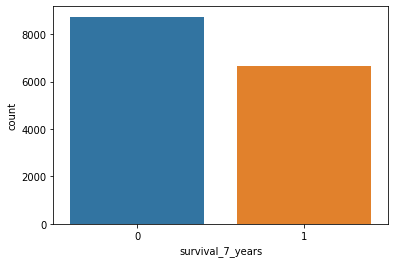

In [252]:
ax=sns.countplot(df.survival_7_years,label="count")
H,D=df.survival_7_years.value_counts()
print("No of Patients who survive 7 years", D)
print("No of Patients who didnt survive 7 years", H)

# Remove the features with NAN

In [249]:
df.isna().sum()

stage                       0
age                         0
race                        0
family_history              0
first_degree_history        0
previous_cancer             0
smoker                      0
side                        0
psa_6_months             9503
psa_1_year               2517
tea                         0
rd_thrpy                    0
h_thrpy                     0
chm_thrpy                   0
cry_thrpy                   0
brch_thrpy                  0
rad_rem                     0
multi_thrpy                 0
survival_1_year             0
survival_7_years            0
O01                         0
O11                         0
P01                         0
P02                         0
S04                         0
S07                         0
S10                         0
U01                         0
U02                         0
U03                         0
U05                         0
U06                         0
TNM_sc                      0
diff6     

In [261]:
col_list = ['psa_6_months', 'psa_1_year','diff6','diff12','BMI']
## Drop these columns - large number of missing values

df.drop(col_list,axis=1,inplace=True)

Remove Rows with Blanks

In [285]:
new_df = df.dropna()

In [288]:
new_df.shape

(15385, 31)

In [286]:
new_df.columns

Index(['stage', 'age', 'race', 'family_history', 'first_degree_history',
       'previous_cancer', 'smoker', 'side', 'tea', 'rd_thrpy', 'h_thrpy',
       'chm_thrpy', 'cry_thrpy', 'brch_thrpy', 'rad_rem', 'multi_thrpy',
       'survival_1_year', 'survival_7_years', 'O01', 'O11', 'P01', 'P02',
       'S04', 'S07', 'S10', 'U01', 'U02', 'U03', 'U05', 'U06', 'TNM_sc'],
      dtype='object')

In [292]:
new_df.age.unique()

array([86, 66, 84, 78, 75, 85, 83, 59, 80, 70, 74, 88, 90, 68, 87, 79, 72,
       71, 64, 81, 62, 73, 57, 69, '', 82, 89, 52, 76, 93, 67, 63, 96, 77,
       92, 91, 58, 60, 54, 61, 94, 95, 53, 55, 56, 97, 65, 45, 51, 47, 99,
       50, 46, 98, 48, 104, 101, 102, 49, 35, 33, 38, 39, 43, 100, 41, 42,
       36, 44, 105, 107, 103, 32, 40], dtype=object)

In [293]:
df.dtypes

stage                   object
age                     object
race                    object
family_history          object
first_degree_history    object
previous_cancer         object
smoker                  object
side                    object
tea                     object
rd_thrpy                 int64
h_thrpy                  int64
chm_thrpy                int64
cry_thrpy                int64
brch_thrpy               int64
rad_rem                  int64
multi_thrpy              int64
survival_1_year          int64
survival_7_years         int64
O01                     object
O11                     object
P01                     object
P02                     object
S04                     object
S07                     object
S10                     object
U01                     object
U02                     object
U03                     object
U05                     object
U06                     object
TNM_sc                  object
dtype: object

In [306]:
#df['age'].astype(str).astype(int)

df.loc[df['age'] == "", "age"] = -1


,stage,age,race,family_history,first_degree_history,previous_cancer,smoker,side,tea,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years,O01,O11,P01,P02,S04,S07,S10,U01,U02,U03,U05,U06,TNM_sc


Change Age to Buckets - 66 is the avg age as per cancer research

In [312]:
df['age_b']=pd.cut(
    df['age'],
    bins= [0,55,60,65,70,75,80,85,90,95,100],
    labels = ['0-55','55-60','60-65','65-70','70-75','75-80','80-85','85-90','90-95','95-100']
)

In [319]:
df.columns

Index(['stage', 'age', 'race', 'family_history', 'first_degree_history',
       'previous_cancer', 'smoker', 'side', 'tea', 'rd_thrpy', 'h_thrpy',
       'chm_thrpy', 'cry_thrpy', 'brch_thrpy', 'rad_rem', 'multi_thrpy',
       'survival_1_year', 'survival_7_years', 'O01', 'O11', 'P01', 'P02',
       'S04', 'S07', 'S10', 'U01', 'U02', 'U03', 'U05', 'U06', 'TNM_sc',
       'age_b'],
      dtype='object')

In [315]:
col_list = ['stage', 'race', 'family_history', 'first_degree_history',
       'previous_cancer', 'smoker', 'side', 'tea', 'rd_thrpy', 'h_thrpy',
       'chm_thrpy', 'cry_thrpy', 'brch_thrpy', 'rad_rem', 'multi_thrpy',
       'survival_1_year', 'survival_7_years', 'O01', 'O11', 'P01', 'P02',
       'S04', 'S07', 'S10', 'U01', 'U02', 'U03', 'U05', 'U06', 'TNM_sc',
       'age_b']
for lst in col_list:
  print(df[lst].value_counts())
  print('===================================================================')


IV     6713
IIB    3463
III    2631
IIA    2045
I       533
Name: stage, dtype: int64
4    11413
2     2264
1      918
3      625
       165
Name: race, dtype: int64
0    8739
1    4379
     1586
2     587
3      82
4      10
5       2
Name: family_history, dtype: int64
0    11148
1     2412
      1586
2      209
3       26
4        4
Name: first_degree_history, dtype: int64
0    12850
      1586
1      949
Name: previous_cancer, dtype: int64
0    13041
      1586
1      758
Name: smoker, dtype: int64
both     7761
right    4596
left     3028
Name: side, dtype: int64
2     3508
3     2944
1     2676
4     1947
      1586
0     1145
5      915
6      425
7      158
8       53
9       24
10       3
12       1
Name: tea, dtype: int64
1    8269
0    7116
Name: rd_thrpy, dtype: int64
0    10110
1     5275
Name: h_thrpy, dtype: int64
1    10207
0     5178
Name: chm_thrpy, dtype: int64
0    11710
1     3675
Name: cry_thrpy, dtype: int64
0    11615
1     3770
Name: brch_thrpy, dtype: int64
0  

In [321]:
df.drop('age',axis=1,inplace=True)

In [322]:
df.shape

(15385, 31)

In [339]:
df.to_csv('Final_file.csv', index=False)

# New Final Upload

In [457]:
df = pd.read_csv('Final_file.csv')
df

,stage,race,family_history,first_degree_history,previous_cancer,smoker,side,tea,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years,O01,O11,P01,P02,S04,S07,S10,U01,U02,U03,U05,U06,Collective sym score,sym,TNM_sc,age_b,65 +
0,I,4.0,0.0,0.0,0.0,0.0,both,2.0,0,0,1,1,0,1,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,I,85-90,1
1,IV,2.0,0.0,0.0,0.0,1.0,both,4.0,1,1,1,0,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,0,IVA,65-70,1
2,IIB,4.0,0.0,0.0,0.0,0.0,right,0.0,1,1,0,0,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4,1,IIIC,80-85,1
3,IIB,3.0,0.0,0.0,0.0,0.0,right,2.0,0,0,0,1,0,1,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,4,1,IIB,85-90,1
4,IV,4.0,1.0,1.0,0.0,0.0,left,2.0,1,1,1,0,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,4,1,IIIB,75-80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,III,4.0,0.0,0.0,0.0,0.0,left,2.0,0,0,1,0,1,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,IIIB,70-75,1
14616,IV,4.0,0.0,0.0,0.0,0.0,both,2.0,1,0,0,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,IIIB,75-80,1
14617,III,4.0,2.0,2.0,0.0,1.0,right,1.0,1,1,0,0,0,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,IIIB,60-65,0
14618,IV,4.0,0.0,0.0,0.0,0.0,left,2.0,0,1,1,1,1,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,IVA,75-80,1


Dropping Age_b and replacing with 65+

In [459]:
drop_sym = ['O01', 'O11', 'P01', 'P02',
       'S04', 'S07', 'S10', 'U01', 'U02', 'U03', 'U05', 'U06','Collective sym score','age_b']

df.drop(drop_sym,axis=1,inplace=True)

In [460]:
df.columns

Index(['stage', 'race', 'family_history', 'first_degree_history',
       'previous_cancer', 'smoker', 'side', 'tea', 'rd_thrpy', 'h_thrpy',
       'chm_thrpy', 'cry_thrpy', 'brch_thrpy', 'rad_rem', 'multi_thrpy',
       'survival_1_year', 'survival_7_years', 'sym', 'TNM_sc', '65 +'],
      dtype='object')

In [461]:
(df.isnull().sum() / df.shape[0] * 100.00).round(2)

stage                    0.00
race                     1.08
family_history          10.28
first_degree_history    10.28
previous_cancer         10.28
smoker                  10.28
side                     0.00
tea                     10.28
rd_thrpy                 0.00
h_thrpy                  0.00
chm_thrpy                0.00
cry_thrpy                0.00
brch_thrpy               0.00
rad_rem                  0.00
multi_thrpy              0.00
survival_1_year          0.00
survival_7_years         0.00
sym                      0.00
TNM_sc                   0.00
65 +                     0.00
dtype: float64

In [462]:
df.shape

(14620, 20)

In [463]:
#Dropping the Columns - symptoms
df1 = df.dropna(how='any',axis=0) 
df1.shape

(12972, 20)

In [464]:
(df1.isnull().sum() / df1.shape[0] * 100.00).round(2)

stage                   0.0
race                    0.0
family_history          0.0
first_degree_history    0.0
previous_cancer         0.0
smoker                  0.0
side                    0.0
tea                     0.0
rd_thrpy                0.0
h_thrpy                 0.0
chm_thrpy               0.0
cry_thrpy               0.0
brch_thrpy              0.0
rad_rem                 0.0
multi_thrpy             0.0
survival_1_year         0.0
survival_7_years        0.0
sym                     0.0
TNM_sc                  0.0
65 +                    0.0
dtype: float64

# EDA

In [476]:
df1.columns

Index(['stage', 'race', 'family_history', 'first_degree_history',
       'previous_cancer', 'smoker', 'side', 'tea', 'rd_thrpy', 'h_thrpy',
       'chm_thrpy', 'cry_thrpy', 'brch_thrpy', 'rad_rem', 'multi_thrpy',
       'survival_1_year', 'survival_7_years', 'sym', 'TNM_sc', 'more_than65'],
      dtype='object')

In [475]:
#df1.rename(columns={'more than 65': 'more_than65'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(0, 0.5, 'Frequency of Survival')

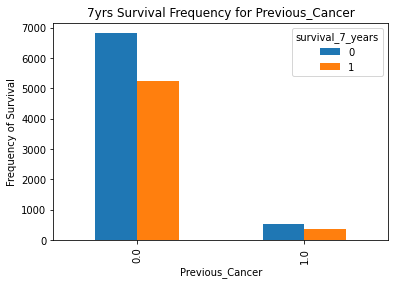

In [466]:
%matplotlib inline
pd.crosstab(df1.previous_cancer,df1.survival_7_years).plot(kind='bar')
plt.title('7yrs Survival Frequency for Previous_Cancer')
plt.xlabel('Previous_Cancer')
plt.ylabel('Frequency of Survival')


Text(0, 0.5, 'Frequency of Survival')

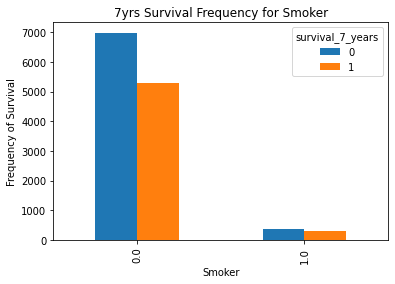

In [393]:
%matplotlib inline
pd.crosstab(df1.smoker,df1.survival_7_years).plot(kind='bar')
plt.title('7yrs Survival Frequency for Smoker')
plt.xlabel('Smoker')
plt.ylabel('Frequency of Survival')


Text(0, 0.5, 'Frequency of Survival')

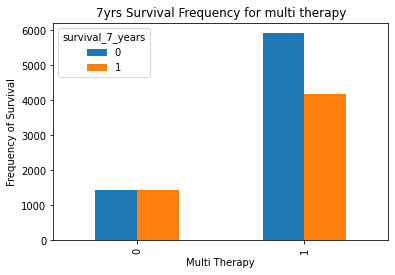

In [394]:
%matplotlib inline
pd.crosstab(df1.multi_thrpy,df1.survival_7_years).plot(kind='bar')
plt.title('7yrs Survival Frequency for multi therapy')
plt.xlabel('Multi Therapy')
plt.ylabel('Frequency of Survival')


Text(0, 0.5, 'Frequency of Survival')

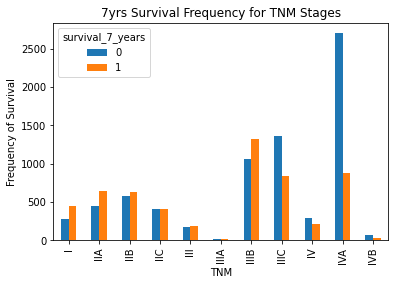

In [395]:
%matplotlib inline
pd.crosstab(df1.TNM_sc,df1.survival_7_years).plot(kind='bar')
plt.title('7yrs Survival Frequency for TNM Stages')
plt.xlabel('TNM')
plt.ylabel('Frequency of Survival')

Text(0, 0.5, 'Frequency of Survival')

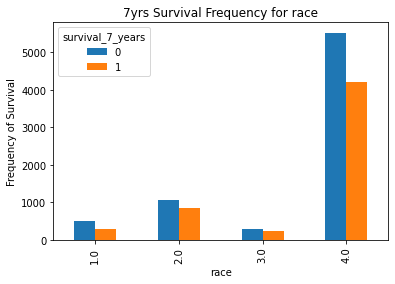

In [396]:
%matplotlib inline
pd.crosstab(df1.race,df1.survival_7_years).plot(kind='bar')
plt.title('7yrs Survival Frequency for race')
plt.xlabel('race')
plt.ylabel('Frequency of Survival')


Text(0, 0.5, 'Frequency of Survival')

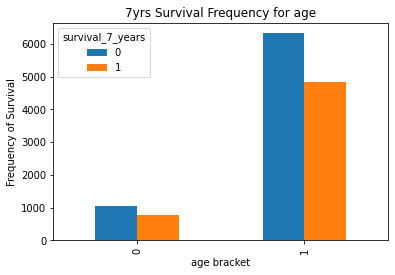

In [477]:
%matplotlib inline
pd.crosstab(df1.more_than65,df1.survival_7_years).plot(kind='bar')
plt.title('7yrs Survival Frequency for age')
plt.xlabel('age bracket')
plt.ylabel('Frequency of Survival')


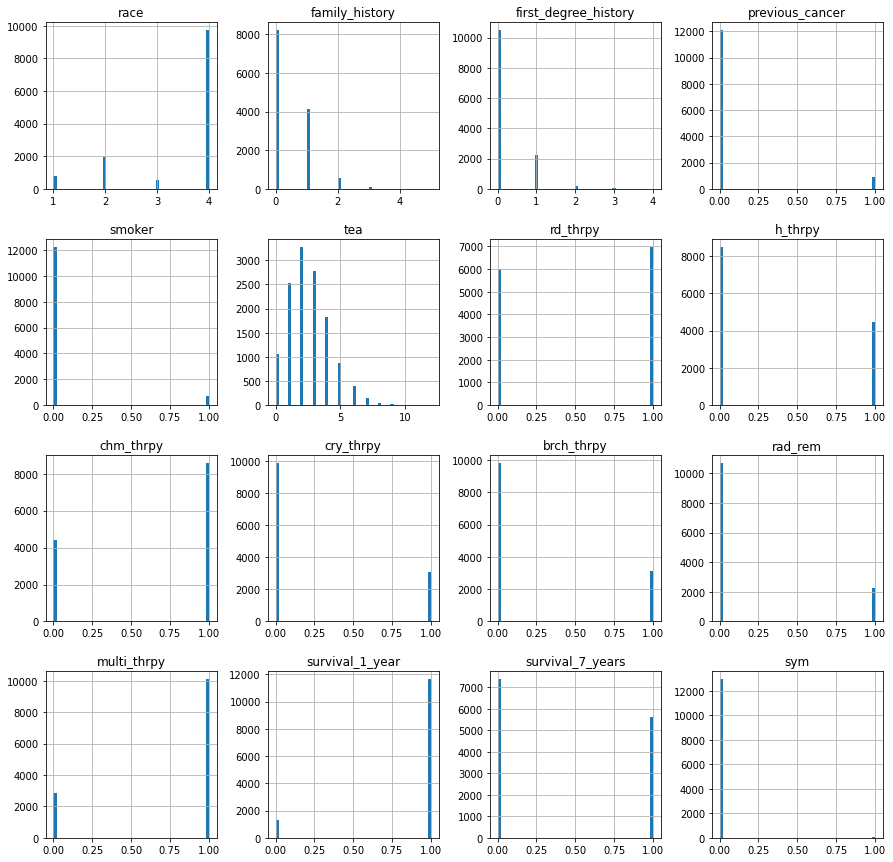

In [398]:
df1.hist(bins = 50, figsize= (15,15))
plt.show()

# create Dummy Varaibles

In [478]:
df1.columns

Index(['stage', 'race', 'family_history', 'first_degree_history',
       'previous_cancer', 'smoker', 'side', 'tea', 'rd_thrpy', 'h_thrpy',
       'chm_thrpy', 'cry_thrpy', 'brch_thrpy', 'rad_rem', 'multi_thrpy',
       'survival_1_year', 'survival_7_years', 'sym', 'TNM_sc', 'more_than65'],
      dtype='object')

The standard threshold is .05, or 5 %.If our p-value is under .05 we will reject the null hypothesis.

So, if a column shows p-value <=0.05 then we reject the null hypothesis and say that ‘Column/Feature affects having higher chances of CKD'..

In [479]:
df1.dtypes

stage                    object
race                    float64
family_history          float64
first_degree_history    float64
previous_cancer         float64
smoker                  float64
side                     object
tea                     float64
rd_thrpy                  int64
h_thrpy                   int64
chm_thrpy                 int64
cry_thrpy                 int64
brch_thrpy                int64
rad_rem                   int64
multi_thrpy               int64
survival_1_year           int64
survival_7_years          int64
sym                       int64
TNM_sc                   object
more_than65               int64
dtype: object

In [413]:
df1['race'] = df1['race'].astype(int)
df1['family_history'] = df1['family_history'].astype(int)
df1['first_degree_history'] = df1['first_degree_history'].astype(int)
df1['tea'] = df1['tea'].astype(int)
df1['previous_cancer'] = df1['previous_cancer'].astype(int)
df1['smoker'] = df1['smoker'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [406]:
# col_list = ['stage', 'race', 'family_history', 'first_degree_history',
#        'previous_cancer', 'smoker', 'side', 'tea', 'rd_thrpy', 'h_thrpy',
#        'chm_thrpy', 'cry_thrpy', 'brch_thrpy', 'rad_rem', 'multi_thrpy',
#        'survival_1_year', 'survival_7_years', 'sym', 'TNM_sc', 'age_b']

# for lst in col_list:
#   print(df[lst].value_counts())
#   print('===================================================================')


## Change the Age Bin to 65,80 after 1st run of RFE on Dummies

In [512]:
df1.columns

Index(['stage', 'race', 'family_history', 'first_degree_history',
       'previous_cancer', 'smoker', 'side', 'tea', 'rd_thrpy', 'h_thrpy',
       'chm_thrpy', 'cry_thrpy', 'brch_thrpy', 'rad_rem', 'multi_thrpy',
       'survival_1_year', 'survival_7_years', 'sym', 'TNM_sc', 'more_than65'],
      dtype='object')

In [514]:
df_final = pd.get_dummies(df1)
df_final

,race,family_history,first_degree_history,previous_cancer,smoker,tea,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years,sym,more_than65,stage_I,stage_IIA,stage_IIB,stage_III,stage_IV,side_both,side_left,side_right,TNM_sc_I,TNM_sc_IIA,TNM_sc_IIB,TNM_sc_IIC,TNM_sc_III,TNM_sc_IIIA,TNM_sc_IIIB,TNM_sc_IIIC,TNM_sc_IV,TNM_sc_IVA,TNM_sc_IVB
0,4.0,0.0,0.0,0.0,0.0,2.0,0,0,1,1,0,1,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2.0,0.0,0.0,0.0,1.0,4.0,1,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,4.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,1,1,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,3.0,0.0,0.0,0.0,0.0,2.0,0,0,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
4,4.0,1.0,1.0,0.0,0.0,2.0,1,1,1,0,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,4.0,0.0,0.0,0.0,0.0,2.0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
14616,4.0,0.0,0.0,0.0,0.0,2.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
14617,4.0,2.0,2.0,0.0,1.0,1.0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
14618,4.0,0.0,0.0,0.0,0.0,2.0,0,1,1,1,1,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0


# find feature imp with RFE

In [481]:
df_final.shape

(12972, 36)

In [482]:
#splitting the data
X=df_final.loc[:, df_final.columns != 'survival_7_years']
y=df_final.survival_7_years

In [483]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(estimator = logreg,n_features_to_select=10)
rfe = rfe.fit(X,y)

# print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[25 24 15 10  6 23  1 17 16 26  5  1 12  1  7 13  1  1 11 18  2 22 19 21
  8  4 14  9  1  3  1  1 20  1  1]


In [484]:
##Selected (i.e., estimated best) features are assigned rank 1.

print(rfe.ranking_)

[25 24 15 10  6 23  1 17 16 26  5  1 12  1  7 13  1  1 11 18  2 22 19 21
  8  4 14  9  1  3  1  1 20  1  1]


Index numbers before age in bins - 6,13,15,16,27,29,30,32,33,43

Index number after Age 65+ >> 6,11,13,16,17,28,30,31,33,34

In [486]:
len(X.columns)

35

In [485]:
X.columns

Index(['race', 'family_history', 'first_degree_history', 'previous_cancer',
       'smoker', 'tea', 'rd_thrpy', 'h_thrpy', 'chm_thrpy', 'cry_thrpy',
       'brch_thrpy', 'rad_rem', 'multi_thrpy', 'survival_1_year', 'sym',
       'more_than65', 'stage_I', 'stage_IIA', 'stage_IIB', 'stage_III',
       'stage_IV', 'side_both', 'side_left', 'side_right', 'TNM_sc_I',
       'TNM_sc_IIA', 'TNM_sc_IIB', 'TNM_sc_IIC', 'TNM_sc_III', 'TNM_sc_IIIA',
       'TNM_sc_IIIB', 'TNM_sc_IIIC', 'TNM_sc_IV', 'TNM_sc_IVA', 'TNM_sc_IVB'],
      dtype='object')

In [496]:
X.columns[6]

'rd_thrpy'

In [495]:
X.columns[11]


'rad_rem'

In [494]:
X.columns[13]

'survival_1_year'

In [493]:
X.columns[16]

'stage_I'

In [492]:
X.columns[17]

'stage_IIA'

In [491]:
X.columns[28]

'TNM_sc_III'

In [490]:
X.columns[30]

'TNM_sc_IIIB'

In [489]:
X.columns[31]

'TNM_sc_IIIC'

In [488]:
X.columns[33]

'TNM_sc_IVA'

In [487]:
X.columns[34]

'TNM_sc_IVB'

## Changing the Age Bin again  - [65,80]

# Logistic Regression Model

In [499]:
df_end = df_final[['rd_thrpy','rad_rem','survival_1_year','stage_I','stage_IIA','TNM_sc_III','TNM_sc_IIIB','TNM_sc_IIIC','TNM_sc_IVA','TNM_sc_IVB','more_than65','survival_7_years']]

In [501]:
#splitting the data
from sklearn.model_selection import train_test_split
X=df_end.loc[:, df_end.columns != 'survival_7_years']
y=df_end.survival_7_years


In [506]:

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.simplefilter(action='ignore')



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

# Evaluation on the given set

In [507]:
y_pred = logreg.predict(X_test)

y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))



Train/Test split results:
LogisticRegression accuracy is 0.650
LogisticRegression log_loss is 0.589
LogisticRegression auc is 0.716


# New Data - Scores predict

In [515]:
df = pd.read_csv('Anisha_score.csv')
df

,id,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,weight,family_history,first_degree_history,previous_cancer,smoker,side,tumor_diagnosis,tumor_6_months,tumor_1_year,psa_diagnosis,psa_6_months,psa_1_year,tea,symptoms,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years
0,20001,Oct-05,8.0,T3b,N0,M0,III,79.0,4.0,68.0,167.0,NaN,NaN,NaN,NaN,both,44.0,49.0,NaN,NaN,8.5,NaN,NaN,"U01,U02,S10",1,1,1,0,0,0,1,NaN,NaN
1,20002,Jun-02,10.0,T2c,N0,M0,IIB,84.0,2.0,70.0,169.0,0.0,0.0,0.0,0.0,both,93.0,NaN,109.0,7.0,NaN,8.2,2.0,"U01,U02,S07",1,0,0,1,0,0,1,NaN,NaN
2,20003,Mar-04,6.0,T4,N0,M0,IV,NaN,4.0,68.0,160.0,0.0,0.0,0.0,0.0,both,35.0,NaN,24.0,9.6,NaN,6.3,4.0,"U06,S07,O11",0,0,1,1,0,0,1,NaN,NaN
3,20004,Oct-03,7.0,T4,N1,M1a,IV,73.0,4.0,69.0,164.0,0.0,0.0,0.0,0.0,left,40.0,NaN,NaN,5.3,NaN,NaN,1.0,"S07,P03",1,0,1,0,1,0,1,0.0,NaN
4,20005,Mar-06,6.0,T1b,N0,M0,IIA,81.0,1.0,69.0,NaN,0.0,0.0,0.0,0.0,left,53.0,NaN,31.0,10.0,NaN,4.2,1.0,"U01,U03,U06,O11",0,0,1,1,0,0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11526,31527,Sep-06,10.0,T4,N1,M0,IV,80.0,4.0,70.0,199.0,NaN,NaN,NaN,NaN,both,68.0,64.0,68.0,24.0,23.6,24.1,NaN,"U01,U02,U06,S07",0,1,1,1,0,0,1,1.0,NaN
11527,31528,Nov-02,7.0,T4,N1,M0,IV,73.0,3.0,69.0,165.0,0.0,0.0,0.0,0.0,both,43.0,NaN,18.0,8.8,NaN,3.5,1.0,"U01,U02,U03,U06",0,1,1,0,0,0,1,1.0,NaN
11528,31529,Oct-02,10.0,T4,N0,M0,IV,62.0,4.0,NaN,213.0,0.0,0.0,0.0,0.0,both,61.0,58.0,63.0,12.3,10.4,10.3,1.0,"U01,U03,U05,S04",1,0,1,0,0,0,1,1.0,NaN
11529,31530,Nov-01,10.0,T1a,N0,M0,IIB,78.0,4.0,67.0,149.0,0.0,0.0,0.0,0.0,both,60.0,NaN,53.0,14.4,NaN,10.8,6.0,U02,1,1,1,1,0,1,1,NaN,NaN


In [516]:
df.columns

Index(['id', 'diagnosis_date', 'gleason_score', 't_score', 'n_score',
       'm_score', 'stage', 'age', 'race', 'height', 'weight', 'family_history',
       'first_degree_history', 'previous_cancer', 'smoker', 'side',
       'tumor_diagnosis', 'tumor_6_months', 'tumor_1_year', 'psa_diagnosis',
       'psa_6_months', 'psa_1_year', 'tea', 'symptoms', 'rd_thrpy', 'h_thrpy',
       'chm_thrpy', 'cry_thrpy', 'brch_thrpy', 'rad_rem', 'multi_thrpy',
       'survival_1_year', 'survival_7_years'],
      dtype='object')

In [523]:
df.shape

(11531, 34)

In [517]:
df.dtypes

id                        int64
diagnosis_date           object
gleason_score           float64
t_score                  object
n_score                  object
m_score                  object
stage                    object
age                     float64
race                    float64
height                  float64
weight                  float64
family_history          float64
first_degree_history    float64
previous_cancer         float64
smoker                  float64
side                     object
tumor_diagnosis         float64
tumor_6_months          float64
tumor_1_year            float64
psa_diagnosis           float64
psa_6_months            float64
psa_1_year              float64
tea                     float64
symptoms                 object
rd_thrpy                  int64
h_thrpy                   int64
chm_thrpy                 int64
cry_thrpy                 int64
brch_thrpy                int64
rad_rem                   int64
multi_thrpy               int64
survival

In [ ]:
# we know the important variables are 
#[['rd_thrpy','rad_rem','survival_1_year','stage_I','stage_IIA','TNM_sc_IIIB','TNM_sc_IIIC','TNM_sc_IVA','TNM_sc_IVB','more_than65','survival_7_years']]

In [519]:
df['TNM_sc'] = ''

# df.loc[((df["t_score"] == "T1c") & (df["gleason_score"] == 4.0)),"TNM_sc"] = 1

df.loc[((df["t_score"] == "T3a") & (df["TNM_sc"] == '') & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 8.0)),"TNM_sc"] = 'IIIB'
df.loc[((df["t_score"] == "T3b") & (df["TNM_sc"] == '') & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 8.0)),"TNM_sc"] = 'IIIB'
df.loc[((df["t_score"] == "T3c") & (df["TNM_sc"] == '') & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 8.0)),"TNM_sc"] = 'IIIB'

df.loc[((df["t_score"] == "T4") & (df["TNM_sc"] == '') & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 8.0)),"TNM_sc"] = 'IIIB'
# df.loc[((df["t_score"] == "T2b") & (df["TNM_sc"] == '') & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 8.0) & (df["psa_diagnosis"] < 20.0)),"TNM_sc"] = 'IIIB'
# df.loc[((df["t_score"] == "T2c") & (df["TNM_sc"] == '') & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 8.0) & (df["psa_diagnosis"] < 20.0)),"TNM_sc"] = 'IIIB'
df.loc[df.TNM_sc == "IIIB"]

,id,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,weight,family_history,first_degree_history,previous_cancer,smoker,side,tumor_diagnosis,tumor_6_months,tumor_1_year,psa_diagnosis,psa_6_months,psa_1_year,tea,symptoms,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years,TNM_sc
0,20001,Oct-05,8.0,T3b,N0,M0,III,79.0,4.0,68.0,167.0,NaN,NaN,NaN,NaN,both,44.0,49.0,NaN,NaN,8.5,NaN,NaN,"U01,U02,S10",1,1,1,0,0,0,1,NaN,NaN,IIIB
2,20003,Mar-04,6.0,T4,N0,M0,IV,NaN,4.0,68.0,160.0,0.0,0.0,0.0,0.0,both,35.0,NaN,24.0,9.6,NaN,6.3,4.0,"U06,S07,O11",0,0,1,1,0,0,1,NaN,NaN,IIIB
7,20008,Jun-04,7.0,T4,N0,M0,IV,76.0,4.0,70.0,194.0,1.0,1.0,0.0,0.0,both,42.0,35.0,42.0,25.0,22.2,20.8,5.0,"U01,U03",0,0,1,0,1,0,1,1.0,NaN,IIIB
8,20009,Feb-06,5.0,T3c,N0,M0,III,77.0,1.0,71.0,184.0,1.0,0.0,0.0,0.0,both,23.0,NaN,0.0,8.6,NaN,0.0,4.0,"U02,U03",0,0,1,0,0,0,0,1.0,NaN,IIIB
15,20016,Sep-01,3.0,T4,N0,M0,IV,84.0,2.0,69.0,206.0,NaN,NaN,NaN,NaN,right,41.0,NaN,39.0,14.0,NaN,13.8,NaN,"U01,S07,S10",1,1,1,1,0,0,1,NaN,NaN,IIIB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11492,31493,Oct-04,7.0,T3b,N0,M0,III,69.0,4.0,69.0,179.0,1.0,0.0,0.0,0.0,right,65.0,NaN,118.0,9.3,NaN,14.9,2.0,"U02,U05,U06",0,1,1,0,1,0,1,NaN,NaN,IIIB
11493,31494,Apr-05,4.0,T4,N0,M0,IV,NaN,4.0,70.0,195.0,0.0,0.0,0.0,0.0,right,51.0,31.0,16.0,11.3,7.0,5.9,1.0,"U01,U02,U03,U05,S07,S04",1,1,0,1,0,0,1,NaN,NaN,IIIB
11501,31502,Jun-02,6.0,T4,N0,M0,IV,80.0,4.0,71.0,180.0,0.0,0.0,0.0,0.0,both,45.0,NaN,16.0,10.3,NaN,NaN,2.0,"U01,U02,U06",0,0,1,0,0,0,0,NaN,NaN,IIIB
11510,31511,May-06,8.0,T4,N0,M0,IV,73.0,4.0,68.0,170.0,0.0,0.0,0.0,0.0,right,18.0,NaN,0.0,14.4,NaN,3.3,2.0,U02,1,0,1,0,0,0,1,NaN,NaN,IIIB


In [520]:
df.loc[((df["n_score"] == "N0") & (df["TNM_sc"] == '') & (df["m_score"] == "M0") & ((df["gleason_score"] == 9.0) | (df["gleason_score"] == 10.0))),"TNM_sc"] = 'IIIC'

df.loc[df.TNM_sc == "IIIC"]

,id,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,weight,family_history,first_degree_history,previous_cancer,smoker,side,tumor_diagnosis,tumor_6_months,tumor_1_year,psa_diagnosis,psa_6_months,psa_1_year,tea,symptoms,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years,TNM_sc
1,20002,Jun-02,10.0,T2c,N0,M0,IIB,84.0,2.0,70.0,169.0,0.0,0.0,0.0,0.0,both,93.0,NaN,109.0,7.0,NaN,8.2,2.0,"U01,U02,S07",1,0,0,1,0,0,1,NaN,NaN,IIIC
6,20007,Nov-00,9.0,T2c,N0,M0,IIB,63.0,3.0,70.0,NaN,1.0,0.0,0.0,0.0,right,44.0,NaN,NaN,NaN,NaN,NaN,4.0,"U01,U02,S04",0,0,0,1,0,0,0,NaN,NaN,IIIC
18,20019,Sep-00,10.0,T2a,N0,M0,IIB,89.0,4.0,69.0,172.0,0.0,0.0,0.0,0.0,right,43.0,NaN,26.0,7.1,NaN,5.0,6.0,"U01,U03",0,1,0,1,1,0,1,NaN,NaN,IIIC
28,20029,Nov-05,10.0,T4,N0,M0,IV,72.0,4.0,NaN,153.0,1.0,1.0,0.0,0.0,left,54.0,50.0,NaN,7.2,7.8,7.2,3.0,S04,1,1,1,0,1,0,1,NaN,NaN,IIIC
37,20038,Jul-04,10.0,T1b,N0,M0,IIB,75.0,4.0,NaN,166.0,1.0,1.0,0.0,0.0,both,73.0,76.0,NaN,8.5,6.7,NaN,4.0,"U02,U03,S04",1,0,0,1,0,0,1,NaN,NaN,IIIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,31516,Jun-03,9.0,T1b,N0,M0,IIB,63.0,1.0,70.0,170.0,0.0,0.0,0.0,0.0,right,34.0,22.0,15.0,5.8,3.5,2.3,2.0,"U01,U02",1,0,0,1,0,0,1,NaN,NaN,IIIC
11520,31521,Dec-02,10.0,T2a,N0,M0,IIB,78.0,2.0,68.0,172.0,0.0,0.0,1.0,0.0,both,46.0,49.0,NaN,NaN,13.0,NaN,2.0,"U01,U02,U06",0,0,1,1,0,0,1,0.0,NaN,IIIC
11523,31524,May-00,10.0,T2a,N0,M0,IIB,78.0,4.0,NaN,175.0,0.0,0.0,0.0,0.0,right,60.0,52.0,59.0,16.3,13.1,13.1,5.0,"U02,S07",1,1,1,0,0,0,1,1.0,NaN,IIIC
11528,31529,Oct-02,10.0,T4,N0,M0,IV,62.0,4.0,NaN,213.0,0.0,0.0,0.0,0.0,both,61.0,58.0,63.0,12.3,10.4,10.3,1.0,"U01,U03,U05,S04",1,0,1,0,0,0,1,1.0,NaN,IIIC


In [521]:
df.loc[((df["n_score"] == "N1") & (df["TNM_sc"] == '')),"TNM_sc"] = 'IVA'
df.loc[df.TNM_sc == "IVA"]

,id,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,weight,family_history,first_degree_history,previous_cancer,smoker,side,tumor_diagnosis,tumor_6_months,tumor_1_year,psa_diagnosis,psa_6_months,psa_1_year,tea,symptoms,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years,TNM_sc
3,20004,Oct-03,7.0,T4,N1,M1a,IV,73.0,4.0,69.0,164.0,0.0,0.0,0.0,0.0,left,40.0,NaN,NaN,5.3,NaN,NaN,1.0,"S07,P03",1,0,1,0,1,0,1,0.0,NaN,IVA
5,20006,Apr-04,6.0,T4,N1,M0,IV,90.0,4.0,69.0,165.0,1.0,0.0,0.0,0.0,left,39.0,33.0,39.0,18.0,17.6,NaN,1.0,"U06,S07,S04",0,0,1,0,1,0,1,NaN,NaN,IVA
9,20010,Aug-06,8.0,T4,N1,M0,IV,80.0,4.0,68.0,171.0,0.0,0.0,0.0,0.0,both,33.0,24.0,28.0,17.5,16.5,15.3,4.0,"U03,S07,S04,O11",1,0,1,1,0,0,1,NaN,NaN,IVA
14,20015,Sep-02,NaN,T4,N1,M0,IV,NaN,4.0,70.0,220.0,0.0,0.0,0.0,0.0,left,32.0,NaN,7.0,8.0,NaN,1.4,5.0,S07,1,0,0,0,0,0,0,NaN,NaN,IVA
20,20021,Jun-06,3.0,T3b,N1,M0,IV,74.0,4.0,70.0,NaN,0.0,0.0,0.0,0.0,both,41.0,NaN,NaN,8.4,NaN,NaN,1.0,"U01,U02,U03,S07,S04",1,0,1,0,0,0,1,0.0,NaN,IVA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11514,31515,Jan-04,8.0,T3c,N1,M0,IV,82.0,4.0,69.0,175.0,0.0,0.0,1.0,0.0,both,49.0,NaN,32.0,14.3,NaN,9.5,2.0,"U02,U03,S07",0,0,1,0,0,0,0,1.0,NaN,IVA
11522,31523,May-06,9.0,T3a,N1,M0,IV,82.0,4.0,68.0,160.0,2.0,1.0,0.0,0.0,both,47.0,NaN,64.0,10.7,NaN,10.8,5.0,"U01,S07",0,0,1,0,0,0,0,NaN,NaN,IVA
11524,31525,Nov-05,7.0,T4,N1,M0,IV,85.0,2.0,68.0,165.0,NaN,NaN,NaN,NaN,both,50.0,NaN,26.0,13.5,NaN,10.8,NaN,U02,0,0,1,0,0,0,0,1.0,NaN,IVA
11526,31527,Sep-06,10.0,T4,N1,M0,IV,80.0,4.0,70.0,199.0,NaN,NaN,NaN,NaN,both,68.0,64.0,68.0,24.0,23.6,24.1,NaN,"U01,U02,U06,S07",0,1,1,1,0,0,1,1.0,NaN,IVA


In [522]:
df.loc[(((df["m_score"] == "M1a") | (df["m_score"] == "M1a") | (df["m_score"] == "M1a"))& (df["TNM_sc"] == '')),"TNM_sc"] = 'IVB'
df.loc[df.TNM_sc == "IVB"]

,id,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,weight,family_history,first_degree_history,previous_cancer,smoker,side,tumor_diagnosis,tumor_6_months,tumor_1_year,psa_diagnosis,psa_6_months,psa_1_year,tea,symptoms,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years,TNM_sc
22,20023,Sep-02,6.0,T2c,NX,M1a,IV,82.0,1.0,67.0,169.0,0.0,0.0,1.0,0.0,both,29.0,NaN,NaN,14.7,NaN,NaN,3.0,"S10,P02",0,0,1,0,0,0,0,0.0,NaN,IVB
24,20025,Nov-00,5.0,T3c,NX,M1a,IV,83.0,4.0,69.0,NaN,0.0,0.0,0.0,0.0,both,34.0,NaN,6.0,5.4,NaN,0.0,1.0,"U01,S04,P01",0,0,1,0,0,0,0,NaN,NaN,IVB
342,20343,Jan-05,7.0,T4,NX,M1a,IV,63.0,4.0,68.0,167.0,0.0,0.0,0.0,0.0,left,35.0,NaN,NaN,10.3,NaN,NaN,6.0,P01,1,0,1,0,0,0,1,0.0,NaN,IVB
539,20540,Dec-06,9.0,T3a,NX,M1a,IV,86.0,4.0,71.0,189.0,0.0,0.0,0.0,0.0,right,41.0,26.0,22.0,8.9,7.5,6.4,2.0,P03,1,0,1,0,0,0,1,NaN,NaN,IVB
586,20587,Jan-05,9.0,T3a,NX,M1a,IV,64.0,4.0,69.0,180.0,0.0,0.0,0.0,0.0,both,78.0,68.0,73.0,13.9,11.1,10.5,0.0,"U02,U03,P01,O08",1,0,1,0,0,0,1,NaN,NaN,IVB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11368,31369,Feb-03,9.0,T3a,NX,M1a,IV,72.0,4.0,71.0,199.0,0.0,0.0,0.0,0.0,both,45.0,25.0,22.0,11.2,7.3,3.1,2.0,"U01,U02,S07,S04,P01",0,0,1,0,0,0,0,1.0,NaN,IVB
11467,31468,Dec-01,10.0,T1c,NX,M1a,IV,75.0,NaN,70.0,173.0,0.0,0.0,0.0,0.0,both,41.0,NaN,62.0,19.1,NaN,20.4,4.0,"U01,U02,S07,P02",1,1,1,0,0,0,1,1.0,NaN,IVB
11477,31478,Feb-05,7.0,T1a,NX,M1a,IV,75.0,2.0,NaN,159.0,0.0,0.0,0.0,0.0,both,37.0,22.0,29.0,15.0,13.7,13.1,5.0,"U02,U05,P01",0,0,1,1,0,0,1,1.0,NaN,IVB
11478,31479,Sep-04,6.0,T3c,NX,M1a,IV,73.0,4.0,69.0,175.0,0.0,0.0,0.0,0.0,right,27.0,NaN,0.0,15.6,NaN,8.6,2.0,"U03,S07,P01,O08,O10",0,0,1,0,0,0,0,1.0,NaN,IVB


In [525]:
df['more_than65']=''
df.loc[((df["age"] >= 65.0)),"more_than65"] = 1
df.loc[((df["age"] < 65.0)),"more_than65"] = 0

In [527]:
df_test_final = pd.get_dummies(df)
df_test_final

,id,gleason_score,age,race,height,weight,family_history,first_degree_history,previous_cancer,smoker,tumor_diagnosis,tumor_6_months,tumor_1_year,psa_diagnosis,psa_6_months,psa_1_year,tea,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years,diagnosis_date_Apr-00,diagnosis_date_Apr-01,diagnosis_date_Apr-03,diagnosis_date_Apr-04,diagnosis_date_Apr-05,diagnosis_date_Apr-06,diagnosis_date_Aug-00,diagnosis_date_Aug-01,diagnosis_date_Aug-02,diagnosis_date_Aug-03,diagnosis_date_Aug-04,diagnosis_date_Aug-05,diagnosis_date_Aug-06,diagnosis_date_Dec-00,...,"symptoms_U05,U06,S04","symptoms_U05,U06,S04,O11","symptoms_U05,U06,S07","symptoms_U05,U06,S07,O11","symptoms_U05,U06,S07,S04","symptoms_U05,U06,S10","symptoms_U05,U06,S10,O11",symptoms_U06,"symptoms_U06,O11","symptoms_U06,P01","symptoms_U06,P01,O09","symptoms_U06,P02,O09,O10","symptoms_U06,P03,O01,O09","symptoms_U06,S04","symptoms_U06,S04,O11","symptoms_U06,S04,P01,O08","symptoms_U06,S04,S10","symptoms_U06,S04,S10,O11","symptoms_U06,S07","symptoms_U06,S07,O11","symptoms_U06,S07,P01,O08,O09","symptoms_U06,S07,P01,O11","symptoms_U06,S07,P02,O08","symptoms_U06,S07,P03,O10","symptoms_U06,S07,S04","symptoms_U06,S07,S04,P01","symptoms_U06,S07,S04,S10","symptoms_U06,S07,S04,S10,P01","symptoms_U06,S07,S10","symptoms_U06,S07,S10,O11","symptoms_U06,S10","symptoms_U06,S10,O11",TNM_sc_,TNM_sc_IIIB,TNM_sc_IIIC,TNM_sc_IVA,TNM_sc_IVB,more_than65_0,more_than65_1,more_than65_
0,20001,8.0,79.0,4.0,68.0,167.0,NaN,NaN,NaN,NaN,44.0,49.0,NaN,NaN,8.5,NaN,NaN,1,1,1,0,0,0,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20002,10.0,84.0,2.0,70.0,169.0,0.0,0.0,0.0,0.0,93.0,NaN,109.0,7.0,NaN,8.2,2.0,1,0,0,1,0,0,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,20003,6.0,NaN,4.0,68.0,160.0,0.0,0.0,0.0,0.0,35.0,NaN,24.0,9.6,NaN,6.3,4.0,0,0,1,1,0,0,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,20004,7.0,73.0,4.0,69.0,164.0,0.0,0.0,0.0,0.0,40.0,NaN,NaN,5.3,NaN,NaN,1.0,1,0,1,0,1,0,1,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,20005,6.0,81.0,1.0,69.0,NaN,0.0,0.0,0.0,0.0,53.0,NaN,31.0,10.0,NaN,4.2,1.0,0,0,1,1,0,0,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11526,31527,10.0,80.0,4.0,70.0,199.0,NaN,NaN,NaN,NaN,68.0,64.0,68.0,24.0,23.6,24.1,NaN,0,1,1,1,0,0,1,1.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
11527,31528,7.0,73.0,3.0,69.0,165.0,0.0,0.0,0.0,0.0,43.0,NaN,18.0,8.8,NaN,3.5,1.0,0,1,1,0,0,0,1,1.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
11528,31529,10.0,62.0,4.0,NaN,213.0,0.0,0.0,0.0,0.0,61.0,58.0,63.0,12.3,10.4,10.3,1.0,1,0,1,0,0,0,1,1.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
11529,31530,10.0,78.0,4.0,67.0,149.0,0.0,0.0,0.0,0.0,60.0,NaN,53.0,14.4,NaN,10.8,6.0,1,1,1,1,0,1,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [531]:
df_test_final.columns.values

array(['id', 'gleason_score', 'age', ..., 'more_than65_0',
       'more_than65_1', 'more_than65_'], dtype=object)

In [542]:
df_endtest = df_test_final[['rd_thrpy','rad_rem','survival_1_year','stage_I','TNM_sc_III','stage_IIA','TNM_sc_IIIB','TNM_sc_IIIC','TNM_sc_IVA','TNM_sc_IVB','more_than65']]

In [ ]:
#[['rd_thrpy','rad_rem','survival_1_year','stage_I','stage_IIA','TNM_sc_IIIB','TNM_sc_IIIC','TNM_sc_IVA','TNM_sc_IVB','more_than65','survival_7_years']]

In [536]:
# df_test_final.rename(columns={'TNM_sc_':'TNM_sc_III'}, inplace=True)
# df_test_final.rename(columns={'more_than65_1':'more_than65'}, inplace=True)

In [543]:
df_endtest.dtypes

rd_thrpy             int64
rad_rem              int64
survival_1_year    float64
stage_I              uint8
TNM_sc_III           uint8
stage_IIA            uint8
TNM_sc_IIIB          uint8
TNM_sc_IIIC          uint8
TNM_sc_IVA           uint8
TNM_sc_IVB           uint8
more_than65          uint8
dtype: object

In [547]:
df_endtest.fillna(0)

,rd_thrpy,rad_rem,survival_1_year,stage_I,TNM_sc_III,stage_IIA,TNM_sc_IIIB,TNM_sc_IIIC,TNM_sc_IVA,TNM_sc_IVB,more_than65
0,1,0,0.0,0,0,0,1,0,0,0,1
1,1,0,0.0,0,0,0,0,1,0,0,1
2,0,0,0.0,0,0,0,1,0,0,0,0
3,1,0,0.0,0,0,0,0,0,1,0,1
4,0,0,0.0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
11526,0,0,1.0,0,0,0,0,0,1,0,1
11527,0,0,1.0,0,0,0,0,0,1,0,1
11528,1,0,1.0,0,0,0,0,1,0,0,0
11529,1,1,0.0,0,0,0,0,1,0,0,1


In [549]:
df_endtest['survival_1_year'] = df_endtest['survival_1_year'].fillna(0)

In [552]:
y_pred_test = logreg.predict(df_endtest)
type(y_pred_test)

numpy.ndarray

In [553]:
pd.DataFrame(y_pred_test).to_csv("final_score.csv")